In [64]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)

In [65]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

##### The data key has the actual data with one row per instance and one column per feature.
##### The target key contains an array with the labels.

In [66]:
X, y = mnist['data'], mnist['target']

In [67]:
X.shape

(70000, 784)

In [68]:
y.shape

(70000,)

##### A single picture has 28 x 28 pixels, hence there are total 784 features. Each feature simply represents one pixel's intensity, from 0 (white) to 1 (black)

This is the image:


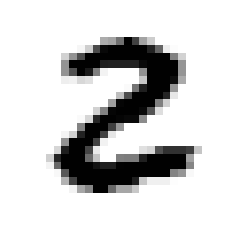

This is the label: 2


In [86]:
#Let's try to visualize one digit from the dataset.

import matplotlib.pyplot as plt

some_digit = X[25]
some_digit_image = some_digit.reshape(28, 28)


print('This is the image:')
plt.imshow(some_digit_image, cmap = 'binary')
plt.axis("off")
plt.show()

print('This is the label: ' + str(y[25]))

##### Note that the labels are as string and we need to convert them to integers first, because the ML models expect them to be numbers.

In [87]:
y = y.astype(np.uint8)

In [88]:
y.dtype

dtype('uint8')

##### Note that the first 60,000 images are for training purpose and the last 10,000 are for testing. ( This is given in the documentation )

In [89]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

##### Let's start slow, we will try to train a binary classifier and make it predict a single digit (eg. 5) and will see if it can tell yes/no for that digit.

In [90]:
y_train_2 = (y_train == 2) # Will return a np array with True and False depending on the value. If it is 2 then True otherwise False.
y_test_2 = (y_test == 2)

In [94]:
y_train_2[28]

True

##### I will train a SGD classifier (stochastic gradient descent) as it is capable of handling very large datasets efficiently.
##### SGD deals with training instances independently (one at a time) which makes it good for online learning also.

In [104]:
from sklearn.linear_model import SGDClassifier

# This model is training for checking the the number is 2 or not.
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(random_state=42)

In [108]:
prd = sgd_clf.predict(X_test)

In [110]:
correct = sum(prd == y_test_2)

In [111]:
result = correct / len(y_test_2)

In [112]:
result

0.9676

##### In this iteration, the prediction was 96.76% correct. Let's have a cross validation and figure out a more accurate score.

In [115]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

/Users/yudi/opt/anaconda3/envs/mlmodels/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [133]:
for train_index, test_index in skfolds.split(X_train, y_train_2):
    clone_clf = clone(sgd_clf) #This gives you a cloned sgd classifier.
    clone_clf.fit(X_train[train_index], y_train_2[train_index])
    prediction = clone_clf.predict(X_train[test_index]) #Find the prediciton
    result = sum(y_train_2[test_index] == prediction)    #See how it went!
    final_result = result / len(prediction)
    print(final_result)
    
    
    
    


0.96645
0.95895
0.904


<generator object _BaseKFold.split at 0x7fb696e3b5f0>

In [134]:
np.zeros((len(X_train), 1), dtype = bool)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])